<a href="https://colab.research.google.com/github/dataskeptic/relatorioPIBIC/blob/main/tf_tfidf__tok2vec_jaccard_distances_steam_poo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy

In [2]:
!python -m spacy download pt_core_news_lg

2023-08-31 17:17:11.137335: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-31 17:17:12.255278: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [3]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import pandas as pd
import numpy as np
import nltk
import re
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
import spacy
nlp = spacy.load('pt_core_news_lg')

In [5]:
def to_lowercase(data):
    return data.str.lower()

def remove_punct(data):
    return data.str.replace(r'[^\w\s]', ' ', regex=True)

def remove_stopwords(text):
    stop_words = set(stopwords.words('portuguese'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text, language='portuguese')
    return ' '.join([lemmatizer.lemmatize(token) for token in tokens])

def stem(text):
    stemmer = SnowballStemmer('portuguese')
    tokens = word_tokenize(text, language='portuguese')
    return ' '.join([stemmer.stem(token) for token in tokens])

def preprocess_text(data):
    data = remove_punct(data)
    data = to_lowercase(data)
    data = data.apply(remove_stopwords)
    #data = data.apply(lemmatize)
    data = data.apply(stem)
    return data


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

path_reference_answers = "drive/MyDrive/PIBIC/data/poo/reference_answers_extended.xlsx"
path_student_answers = "drive/MyDrive/PIBIC/data/poo/student_answers.xlsx"

reference_answers = pd.read_excel(path_reference_answers)
student_answers = pd.read_excel(path_student_answers)

print(reference_answers.head())
print("---------------------------------------")
print(student_answers)

   question_id                                        refans_text  \
0            1  Polimorfismo é uma característica das linguage...   
1            1  Polimorfismo é a capacidade de uma classe se c...   
2            1  Polimorfismo refere-se à capacidade de um méto...   
3            1  Em programação orientada a objetos, polimorfis...   
4            1  O polimorfismo é um conceito em programação or...   

                                           enunciado  
0  Sobre Orientação a Objetos, descreva o que voc...  
1  Sobre Orientação a Objetos, descreva o que voc...  
2  Sobre Orientação a Objetos, descreva o que voc...  
3  Sobre Orientação a Objetos, descreva o que voc...  
4  Sobre Orientação a Objetos, descreva o que voc...  
---------------------------------------
     question_id                                        answer_text  notas
0              1  Polimorfismo é, como o nome sugere (múltiplas ...   1.11
1              2  Classes são modelos/"estruturas" de coisas tra.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
from collections import Counter
import matplotlib.pyplot as plt

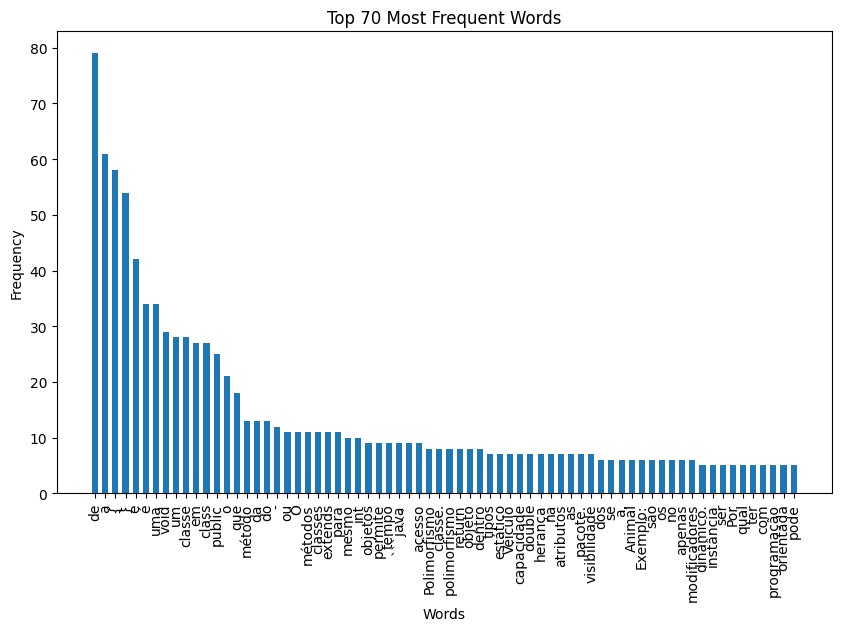

In [10]:
all_words = [word for tokens in reference_answers['refans_text'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

In [11]:
reference_answers['refans_preprocess'] = preprocess_text(reference_answers['refans_text'])

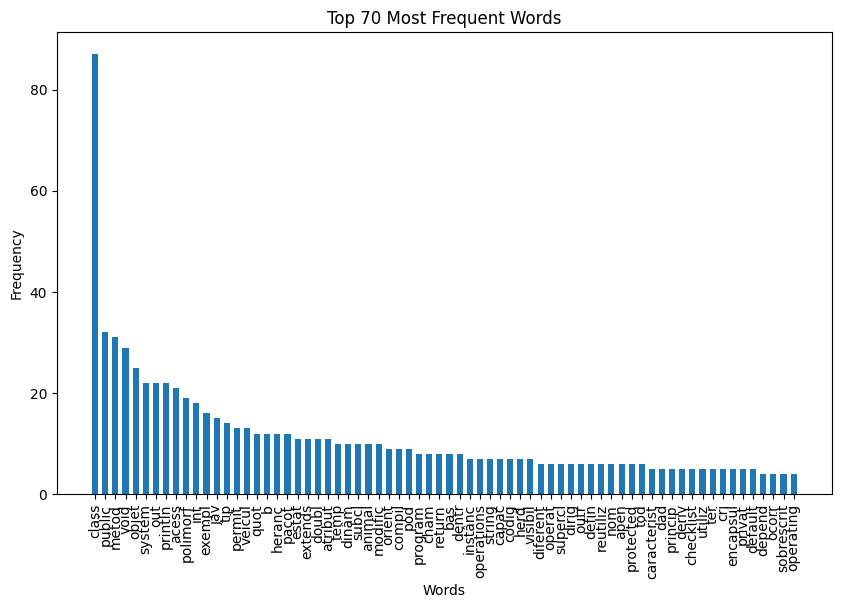

In [12]:
all_words = [word for tokens in reference_answers['refans_preprocess'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

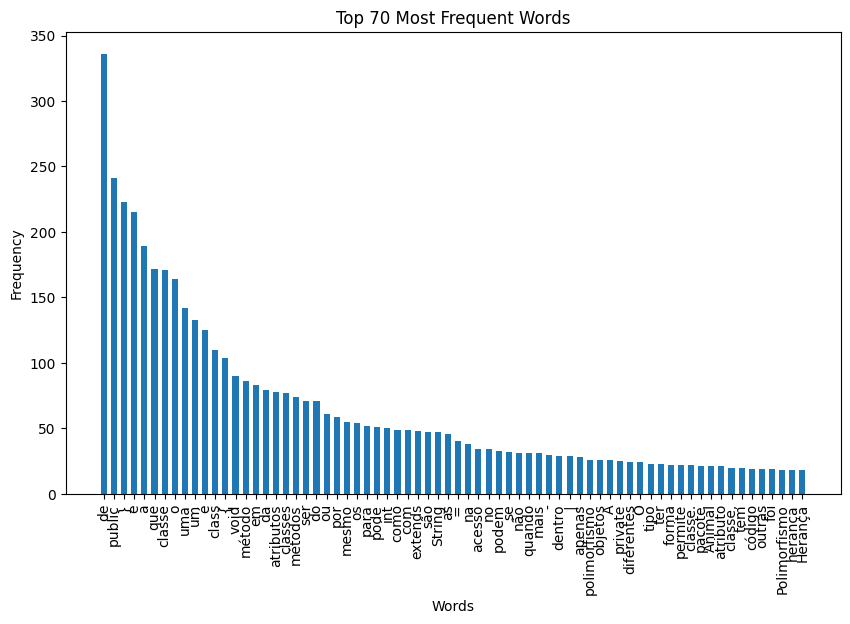

In [13]:
all_words = [word for tokens in student_answers['answer_text'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

In [14]:
student_answers['answer_text'] = student_answers['answer_text'].fillna('')

In [15]:
student_answers['answer_preprocess'] = preprocess_text(student_answers['answer_text'])

In [16]:
print(student_answers['answer_preprocess'])

0      polimorf nom suger múltipl form maneir conceit...
1      class model estrutur cois transcrit códig onde...
2      heranc poo bem fácil entend olhad context usad...
3      possív modific acess 4 public privat protected...
4      polimorf estát permit cri exempl métod simil n...
                             ...                        
119                                              nao sei
120    polimorf permit part contrat defin class bas o...
121    class estrutur dad reun conjunt métod atribut ...
122    heranc permit atribut métod class incorpor mel...
123    public permit qualqu métod atribut class cham ...
Name: answer_preprocess, Length: 124, dtype: object


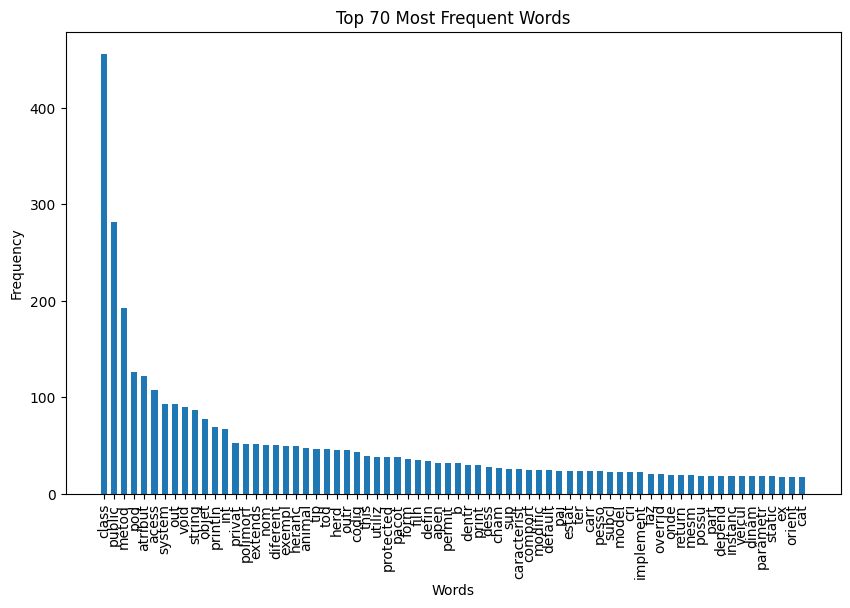

In [17]:
all_words = [word for tokens in student_answers['answer_preprocess'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

In [18]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tf_vectorizer = CountVectorizer()

In [22]:
tf_tfidf_similarities = pd.DataFrame()

for questionId in range(1, 5):
  temp_student_answers = student_answers[student_answers['question_id'] ==  questionId].copy()
  refans_tfidf = tfidf_vectorizer.fit_transform(reference_answers['refans_preprocess'][reference_answers['question_id'] == questionId].copy())
  refans_tf = tf_vectorizer.fit_transform(reference_answers['refans_preprocess'][reference_answers['question_id'] == questionId].copy())

  for index, row in temp_student_answers.iterrows():
    temp_answer_tfidf = tfidf_vectorizer.transform([temp_student_answers['answer_preprocess'][index]])
    temp_answer_tf = tf_vectorizer.transform([temp_student_answers['answer_preprocess'][index]])

    tfidf_cosine_similarity = ([(cosine_similarity(temp_answer_tfidf, ref_tfidf)[0][0]) for ref_tfidf in refans_tfidf])
    tf_cosine_similarity = ([(cosine_similarity(temp_answer_tf, ref_tf)[0][0]) for ref_tf in refans_tf])
    tfidf_similarities = max(tfidf_cosine_similarity), np.mean(tfidf_cosine_similarity), np.median(tfidf_cosine_similarity), min(tfidf_cosine_similarity)
    tf_similarities = max(tf_cosine_similarity), np.mean(tf_cosine_similarity), np.median(tf_cosine_similarity), min(tf_cosine_similarity)

    temp_student_answers.loc[index, ('max_cosine_tfidf', 'mean_cosine_tfidf', 'median_cosine_tfidf', 'min_cosine_tfidf')] = tfidf_similarities
    temp_student_answers.loc[index, ('max_cosine_tf', 'mean_cosine_tf', 'median_cosine_tf', 'min_cosine_tf')] = tf_similarities

  tf_tfidf_similarities = pd.concat([tf_tfidf_similarities, temp_student_answers])
print(tf_tfidf_similarities[['max_cosine_tfidf', 'mean_cosine_tfidf', 'median_cosine_tfidf', 'min_cosine_tfidf']])
print(tf_tfidf_similarities[['max_cosine_tf', 'mean_cosine_tf', 'median_cosine_tf', 'min_cosine_tf']])

     max_cosine_tfidf  mean_cosine_tfidf  median_cosine_tfidf  \
0            0.372544           0.312914             0.323562   
4            0.405342           0.310545             0.299919   
8            0.205481           0.147650             0.148374   
12           0.426981           0.294745             0.248848   
16           0.447784           0.344363             0.371230   
..                ...                ...                  ...   
107          0.688649           0.389031             0.411320   
111          0.527817           0.428830             0.391652   
115          0.448784           0.334479             0.288573   
119          0.000000           0.000000             0.000000   
123          0.501646           0.416386             0.435805   

     min_cosine_tfidf  
0            0.227247  
4            0.200667  
8            0.088089  
12           0.168933  
16           0.180363  
..                ...  
107          0.197137  
111          0.372471  
115

In [23]:
def jaccard_similarity(sentence1, sentence2):
    # Tokenize the sentences
    set1 = set(sentence1.split())
    set2 = set(sentence2.split())

    # Calculate intersection and union of the two sets
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))

    # Calculate Jaccard similarity
    return intersection / union if union != 0 else 0

In [24]:
jaccard_similarities = pd.DataFrame()

for questionId in range(1, 16):
  temp_student_answers = student_answers[student_answers['question_id'] ==  questionId].copy()
  refans = reference_answers['refans_preprocess'][reference_answers['question_id'] == questionId].copy()

  for index, row in temp_student_answers.iterrows():
    temp_answer = temp_student_answers['answer_preprocess'][index]
    jaccard_scores = ([(jaccard_similarity(temp_answer, ref)) for ref in refans])
    similarities = max(jaccard_scores),  np.mean(jaccard_scores), np.median(jaccard_scores), min(jaccard_scores)
    temp_student_answers.loc[index, ('max_jaccard', 'mean_jaccard', 'median_jaccard', 'min_jaccard')] = similarities

  jaccard_similarities = pd.concat([jaccard_similarities, temp_student_answers])
print(jaccard_similarities[['max_jaccard', 'mean_jaccard', 'median_jaccard', 'min_jaccard']])

     max_jaccard  mean_jaccard  median_jaccard  min_jaccard
0       0.207921      0.176106        0.171429     0.159664
4       0.183333      0.163008        0.171053     0.126984
8       0.109091      0.089327        0.087719     0.072727
12      0.166667      0.140203        0.136364     0.119403
16      0.179487      0.139366        0.137500     0.112500
..           ...           ...             ...          ...
107     0.392857      0.310677        0.333333     0.210526
111     0.354839      0.313322        0.297297     0.289474
115     0.185185      0.155457        0.166667     0.104167
119     0.000000      0.000000        0.000000     0.000000
123     0.340909      0.288067        0.292683     0.224490

[124 rows x 4 columns]


In [25]:
tok2vec_similarities = pd.DataFrame()

for questionId in range(1, 16):
  temp_student_answers = student_answers[student_answers['question_id'] ==  questionId].copy()
  refans_tok2vec = (reference_answers['refans_preprocess'][reference_answers['question_id'] == questionId].copy())
  refans_tok2vec = [nlp(ref) for ref in refans_tok2vec]

  for index, row in temp_student_answers.iterrows():

    temp_answer_tok2vec = nlp(temp_student_answers['answer_preprocess'][index])

    tok2vec_cosine_similarity = ([temp_answer_tok2vec.similarity(ref_tok2vec) for ref_tok2vec in refans_tok2vec])
    similarities = max(tok2vec_cosine_similarity), np.mean(tok2vec_cosine_similarity), np.median(tok2vec_cosine_similarity), min(tok2vec_cosine_similarity)

    temp_student_answers.loc[index, ('max_cosine_tok2vec', 'mean_cosine_tok2vec', 'median_cosine_tok2vec', 'min_cosine_tok2vec')] = similarities

  tok2vec_similarities = pd.concat([tok2vec_similarities, temp_student_answers])
print(tok2vec_similarities[['max_cosine_tok2vec', 'mean_cosine_tok2vec', 'median_cosine_tok2vec', 'min_cosine_tok2vec']])

     max_cosine_tok2vec  mean_cosine_tok2vec  median_cosine_tok2vec  \
0              0.855942             0.823817               0.825875   
4              0.891276             0.839927               0.845557   
8              0.751384             0.718100               0.718881   
12             0.923532             0.843571               0.842017   
16             0.862260             0.806882               0.805542   
..                  ...                  ...                    ...   
107            0.957714             0.907846               0.923390   
111            0.909037             0.822638               0.796229   
115            0.917906             0.887014               0.906752   
119            0.208743             0.132950               0.117995   
123            0.923042             0.846464               0.831325   

     min_cosine_tok2vec  
0              0.791715  
4              0.791324  
8              0.689316  
12             0.802983  
16             0.

In [26]:
dfs = [tok2vec_similarities, jaccard_similarities, tf_tfidf_similarities]
similarities = pd.concat(dfs, axis=1)

# Remover colunas duplicadas (se necessário)
similarities = similarities.loc[:, ~similarities.columns.duplicated()]

print(similarities)

     question_id                                        answer_text  notas  \
0              1  Polimorfismo é, como o nome sugere (múltiplas ...   1.11   
4              1  O polimorfismo estático ele permite que nós cr...   0.40   
8              1  Polimorfismo é o princípio ao qual as classes ...   0.10   
12             1  É a capacidade que um mesmo tipo tem de assumi...   0.40   
16             1  A primeiro categoria de polimorfismo é evidenc...   1.00   
..           ...                                                ...    ...   
107            4  Public: os atributos podem ser acessados por o...   0.78   
111            4  public: esse modificador permite que os atribu...   0.40   
115            4  Em Java existe a possibilidade de modificar a ...   0.60   
119            4                                            Nao sei   0.00   
123            4  public - Permite que qualquer método ou atribu...   0.75   

                                     answer_preprocess  max_cos

In [27]:
similarity_columns = [col for col in similarities.columns[4:]]
statistics = similarities[similarity_columns].describe()
statistics

,max_cosine_tok2vec,mean_cosine_tok2vec,median_cosine_tok2vec,min_cosine_tok2vec,max_jaccard,mean_jaccard,median_jaccard,min_jaccard,max_cosine_tfidf,mean_cosine_tfidf,median_cosine_tfidf,min_cosine_tfidf,max_cosine_tf,mean_cosine_tf,median_cosine_tf,min_cosine_tf
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.799528,0.760284,0.764470,0.714622,0.216696,0.165416,0.161538,0.127547,0.469406,0.306040,0.287836,0.190811,0.576299,0.463649,0.468012,0.350687
std,0.232358,0.233891,0.237542,0.232025,0.148748,0.093470,0.089966,0.074186,0.217150,0.133652,0.137505,0.097222,0.240612,0.192815,0.202065,0.158775
min,0.123716,0.087043,0.071845,0.053544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.833594,0.792745,0.796125,0.745628,0.153846,0.122510,0.117456,0.086084,0.412201,0.278841,0.214876,0.137423,0.552113,0.434017,0.411307,0.292957
50%,0.888584,0.848506,0.852416,0.800477,0.198291,0.153111,0.150000,0.118664,0.508814,0.333628,0.310925,0.207933,0.637697,0.528933,0.519926,0.384846
75%,0.917575,0.880153,0.888225,0.837697,0.256426,0.217307,0.214379,0.178082,0.580377,0.398757,0.375641,0.258535,0.707967,0.587393,0.596487,0.465599
max,1.000000,0.909875,0.935768,0.892903,1.000000,0.465946,0.365854,0.296296,1.000000,0.512071,0.572826,0.390220,1.000000,0.671468,0.751068,0.593179


In [28]:
def similarity_to_score(similarity):
    median = similarities[f'{column_name}'].median()
    std = similarities[f'{column_name}'].std()
    lower_bound = (median - std)
    upper_bound = (median + std)
    if similarity < lower_bound:
        return 0
    elif similarity > upper_bound:
        return 3
    else:
        # For values between lower_bound and upper_bound
        distance_to_lower = abs(similarity - lower_bound)
        distance_to_upper = abs(similarity - upper_bound)

        # If similarity is closer to the lower_bound, return 1, otherwise return 2
        return 1 if distance_to_lower < distance_to_upper else 2

for column_name in similarities.columns[4:]:
    similarities[f'{column_name}_grade'] = similarities[f'{column_name}'].apply(lambda sim: similarity_to_score(sim))

In [29]:
def similarity_to_score(similarity):
    if similarity <= 0.3 :
        score = 0
    elif similarity <= 0.6:
        score = 1
    elif similarity <= 0.9:
        score = 2
    else:
        score = 3
    return score

similarities['grade'] = similarities['notas'].apply(similarity_to_score)
similarities['grade'].value_counts()

3    56
2    38
0    21
1     9
Name: grade, dtype: int64

In [30]:
grade_columns = [col for col in similarities.columns if col.endswith('grade')]

grade_similarities = similarities[grade_columns]

# Show frequencies for each 'grade' column
for col in grade_similarities.columns:
    print(f"Frequencies for {col}:")
    print(grade_similarities[col].value_counts())
    print("\n")

Frequencies for max_cosine_tok2vec_grade:
2    62
1    47
0    15
Name: max_cosine_tok2vec_grade, dtype: int64


Frequencies for mean_cosine_tok2vec_grade:
2    62
1    47
0    15
Name: mean_cosine_tok2vec_grade, dtype: int64


Frequencies for median_cosine_tok2vec_grade:
2    62
1    47
0    15
Name: median_cosine_tok2vec_grade, dtype: int64


Frequencies for min_cosine_tok2vec_grade:
2    62
1    47
0    15
Name: min_cosine_tok2vec_grade, dtype: int64


Frequencies for max_jaccard_grade:
1    48
2    46
3    16
0    14
Name: max_jaccard_grade, dtype: int64


Frequencies for mean_jaccard_grade:
1    48
2    39
3    23
0    14
Name: mean_jaccard_grade, dtype: int64


Frequencies for median_jaccard_grade:
1    46
2    38
3    25
0    15
Name: median_jaccard_grade, dtype: int64


Frequencies for min_jaccard_grade:
1    45
2    37
3    25
0    17
Name: min_jaccard_grade, dtype: int64


Frequencies for max_cosine_tfidf_grade:
2    53
1    43
0    19
3     9
Name: max_cosine_tfidf_grade, dt

In [31]:
from sklearn.metrics import cohen_kappa_score

In [32]:
similarities_columns = [col for col in grade_similarities.columns if col.endswith('grade') and col != 'grade']
kappa_results = []
# Calculate Cohen's Kappa for each column with the reference 'grade' column
for col in similarities_columns:
    kappa_linear = cohen_kappa_score(grade_similarities[col], grade_similarities['grade'], weights='linear')
    kappa_quadratic = cohen_kappa_score(grade_similarities[col], grade_similarities['grade'], weights='quadratic')

    kappa_results.append({
        'Column': col,
        'Kappa_Linear': kappa_linear,
        'Kappa_Quadratic': kappa_quadratic
    })

# Transformar a lista de dicionários em um DataFrame
kappa_similarities = pd.DataFrame(kappa_results)

print(kappa_similarities)

                         Column  Kappa_Linear  Kappa_Quadratic
0      max_cosine_tok2vec_grade      0.234485         0.374546
1     mean_cosine_tok2vec_grade      0.274775         0.427939
2   median_cosine_tok2vec_grade      0.274775         0.427939
3      min_cosine_tok2vec_grade      0.261345         0.397429
4             max_jaccard_grade      0.339147         0.492402
5            mean_jaccard_grade      0.335477         0.493353
6          median_jaccard_grade      0.376751         0.528357
7             min_jaccard_grade      0.325304         0.474867
8        max_cosine_tfidf_grade      0.363665         0.515570
9       mean_cosine_tfidf_grade      0.382169         0.535795
10    median_cosine_tfidf_grade      0.355576         0.479815
11       min_cosine_tfidf_grade      0.333884         0.456751
12          max_cosine_tf_grade      0.357445         0.514928
13         mean_cosine_tf_grade      0.319759         0.479860
14       median_cosine_tf_grade      0.339800         0

In [ ]:
similarities.to_excel('drive/MyDrive/PIBIC/data/results/similarities/similarities_biology_lemma.xlsx', index=False)
kappa_similarities.to_excel('drive/MyDrive/PIBIC/data/results/kappa/kappa_biology_lemma.xlsx', index=False)